#NeqSim excercise in thermodynamics 

In [10]:
import neqsim
from neqsim.thermo.thermoTools import *

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

##Calculation of boiling point of pure components.
Calculate the boiling point temperature of pure methane, propane and n-heptane at 1 atm. 
Draw the boiling point temperatrure line of the pure components between 1 atm. and 10 bar.

methane buble point temperature  -88.27559931857249  at pressure  1.01325
methane entalpy of vaporization  (362.16402028412415, ' kJ/kg')


Text(0, 0.5, 'Pressure [bara]')

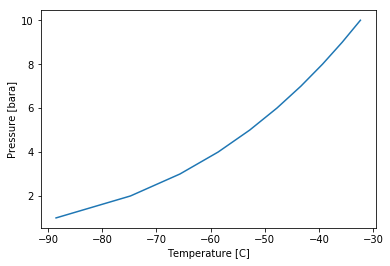

In [12]:
fluid1 = fluid('srk') #create a fluid using the SRK-EoS
fluid1.addComponent('methane', 1.0) #adding 1 mole methane to the fluid
fluid1.setTemperature(111.0) # setting an initial temperature of -160 deg C
fluid1.setPressure(1.01325)#
bubt(fluid1)
print('methane buble point temperature ', fluid1.getTemperature('C'), " at pressure ", fluid1.getPressure('bara'))
print('methane entalpy of vaporization ', (fluid1.getPhase('gas').getEnthalpy('kJ/kg')-fluid1.getPhase('oil').getEnthalpy('kJ/kg'), ' kJ/kg'))

def bubleP(pressure):
    fluid1.setPressure(pressure)
    bubt(fluid1)
    return fluid1.getTemperature('C')

pressure = np.arange(1.0, 11.0, 1.0)
temperature = [bubleP(P) for P in pressure]

plt.plot(temperature, pressure)
plt.xlabel('Temperature [C]')
plt.ylabel('Pressure [bara]')

##Calculation of heat of vapourization of pure components.
Calculate the heat of vapourization at 1 atm for methane. Draw the heat of vapourization line  of methane between 1 atm. and 10 bar.

methane entalpy of vapourization  (524.1675011225673, ' kJ/kg')


Text(0, 0.5, 'Enthalpy of vaporization [kJ/kg]')

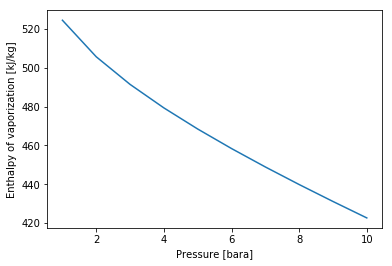

In [4]:
fluid1 = fluid('srk') #create a fluid using the SRK-EoS
fluid1.addComponent('methane', 1.0) #adding 1 mole methane to the fluid
fluid1.setTemperature(111.0) # setting an initial temperature of -160 deg C
fluid1.setPressure(1.01325)#
bubt(fluid1)
fluid1.init(3) #initializes/calculates all thermodynamic properties of the fluid (including enthalpy)
print('methane entalpy of vapourization ', (fluid1.getPhase('gas').getEnthalpy('kJ/kg')-fluid1.getPhase('oil').getEnthalpy('kJ/kg'), ' kJ/kg'))

def enthalp(pressure):
    fluid1.setPressure(pressure)
    bubt(fluid1)
    fluid1.init(3) 
    return (fluid1.getPhase('gas').getEnthalpy('kJ/kg')-fluid1.getPhase('oil').getEnthalpy('kJ/kg'))

pressure = np.arange(1.0, 11.0, 1.0)
entha = [enthalp(P) for P in pressure]

plt.plot(pressure, entha)
plt.xlabel('Pressure [bara]')
plt.ylabel('Enthalpy of vaporization [kJ/kg]')

##Calculation of boiling point of a binary mixture. Calculate the boiling point temperature of a propane and n-pentane mxture (50/50 mol%) at 1 atm. Draw the boiling point temperatrure line of the pure components between 1 atm. and 10 bar.

mixture buble point temperature  -25.628426480557636  at pressure  1.01325
mixture entalpy of vaporization  (281.9951198653572, ' kJ/kg')


Text(0, 0.5, 'Pressure [bara]')

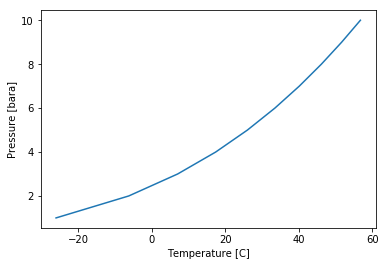

In [8]:
fluid1 = fluid('srk') #create a fluid using the SRK-EoS
fluid1.addComponent('propane', 1.0) #adding 1 mole propane to the fluid
fluid1.addComponent('n-pentane', 1.0) #adding 1 mole n-pentane to the fluid
fluid1.setMixingRule('classic') # setting the mixing rule using a constant binary interaction parameter (kij)
fluid1.setTemperature(250.0) # setting an initial temperature in Kelvin
fluid1.setPressure(1.01325)# setting pressure of the fluid in bara
bubt(fluid1)
print('mixture buble point temperature ', fluid1.getTemperature('C'), " at pressure ", fluid1.getPressure('bara'))
print('mixture entalpy of vaporization ', (fluid1.getPhase('gas').getEnthalpy('kJ/kg')-fluid1.getPhase('oil').getEnthalpy('kJ/kg'), ' kJ/kg'))

def bubleP(pressure):
    fluid1.setPressure(pressure)
    bubt(fluid1)
    return fluid1.getTemperature('C')

pressure = np.arange(1.0, 11.0, 1.0)
temperature = [bubleP(P) for P in pressure]

plt.plot(temperature, pressure)
plt.xlabel('Temperature [C]')
plt.ylabel('Pressure [bara]')

dewt  323.14052331941497
no dewt found


Text(0, 0.5, 'Pressure [bara]')

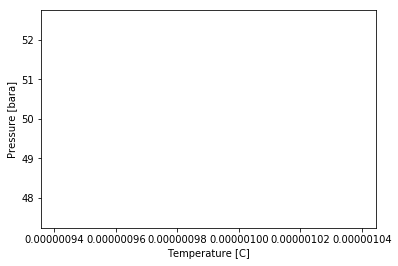

In [9]:
bubpres = []
dewpres = []
x = []
y = []
x2 = []
y2 = []
comp1 = 'propane'
comp2 = 'n-butane'

fluid1 = fluid('srk')
addComponent(fluid1, comp1,0.000001)
addComponent(fluid1, comp2,1.01)
fluid1.setMixingRule('classic')
fluid1.setTemperature(200.0)
fluid1.setPressure(5.0)

try:
        for temp in range(0,102):
                print('dewt ', bubt(fluid1))
                dewpres.append(fluid1.getTemperature()-273.15)
                x.append(fluid1.getPhase(0).getComponent(0).getz())
                x2.append(fluid1.getPhase(1).getComponent(0).getx())
                #y.append(system.getPhase(0).getComponent(1).getx())
                addComponent(fluid1,comp2,-0.01)
                addComponent(fluid1, comp1,0.01)
except:
        print('no dewt found')

plt.plot(x, dewpres)
plt.xlabel('Temperature [C]')
plt.ylabel('Pressure [bara]')